## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
%pip install pandas matplotlib seaborn scikit-learn sklearn-pandas

Note: you may need to restart the kernel to use updated packages.


**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
# uncomment the following lines if Google Colab is being used
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
Loan = pd.read_csv('Loan_Modelling.csv')   ##  Complete the code to read the data

In [5]:
# copying data to another variable to avoid any changes to original data
data = Loan.copy()

## Data Overview

* Observations
* Sanity checks

In [6]:
data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
data.tail(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [8]:
data.shape

(5000, 14)

There are 5000 rows and 14 columns.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


We have 12 Integer, 1 Float columns in the dataset

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


* Average age of the customers is 45, with a minimum age of 23 and max age of 67 years. 
* There seems to be an error on the minimum experience (-3 ) but the maximum experience of customers is 43 years with a combined average experience of 20 years.
* Income ranges from 8,000 USD TO 224,000 USD with an average income of approximately 74,000 USD. Also 50% of all customers in the dataset have incomes of 64,000 USD and above.
* Zipcodes are not clear and need to be checked and formatted.
* The average family size for each customer is 2 with 50% of all customers having a family size of 2 and above.
* The average spending on credit cards is approimately 2,000 USD per month
* The average value of mortgages held by each customer is around 56,000 USD with a standard deviation of 101,000 USD.
* Education Level, Personal Loan Accounts, Securities_Account, CD_Account statistics are set as classification variables. Separate analayis needs to be done.

In [11]:
# Write your code here
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

no missing values in the dataset

In [12]:
data = data.drop(['ID'], axis=1)

We do not need ID so we will drop it.

In [13]:
# Check for duplicated values
data.duplicated().sum()
data.loc[data.duplicated()]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


no duplicates in the dataset

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Checking for Anomalous Values

In [14]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

Unique values in Experience show negative values.

In [15]:
# checking for experience <0
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

-1,-2,-3 are the negative values in experience

In [16]:
# Correcting the experience values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

Replacing negative values with their absolute values since negative sign might be put by mistake. 

In [17]:
data["Education"].unique()

array([1, 2, 3])

Education has three unique values. 

### Feature Engineering

In [18]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

There are many ZIPCodes. We need to reduce it. 

In [19]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [20]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

Converted Classification variables as category. 

### Outlier Detection

In [21]:
def calculate_outlier_percentage(df, multiplier=1.5):
    # Select numerical columns
    numerical_df = df.select_dtypes(include=["float64", "int64"])
    
    # Calculate Q1, Q3, and IQR
    Q1 = numerical_df.quantile(0.25)
    Q3 = numerical_df.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine lower and upper bounds
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    
    # Calculate outlier percentage
    outlier_percentage = (
        (numerical_df < lower) | (numerical_df > upper)
    ).sum() / len(df) * 100
    
    return outlier_percentage

# Usage
outlier_percentages = calculate_outlier_percentage(data)
print(outlier_percentages)

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64


There are some outliers in Income, CCAvg and Mortgage.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

In [22]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    Parameters:
    - data: pandas DataFrame
    - feature: string, column name in data
    - figsize: tuple, size of the figure (default (12,7))
    - kde: bool, whether to show the density curve (default False)
    - bins: int or None, number of bins for histogram (default None)
    """

    # Create subplots with specified size and layout
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Create boxplot
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    ax_box2.set_title(f'Boxplot of {feature}')
    ax_box2.set_ylabel('')  # Hide y-axis label for clarity

    # Create histogram
    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        )
    else:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2
        )
    ax_hist2.set_title(f'Histogram of {feature}')
    ax_hist2.set_xlabel(f'{feature}')
    ax_hist2.set_ylabel('Frequency')

    # Add mean and median lines
    mean_val = data[feature].mean()
    median_val = data[feature].median()
    ax_hist2.axvline(mean_val, color="green", linestyle="--", label=f'Mean: {mean_val:.2f}')
    ax_hist2.axvline(median_val, color="black", linestyle="-", label=f'Median: {median_val:.2f}')

    # Add legend for mean and median
    ax_hist2.legend()

    # Adjust layout for better spacing
    plt.tight_layout()

    # Display the plot
    plt.show()

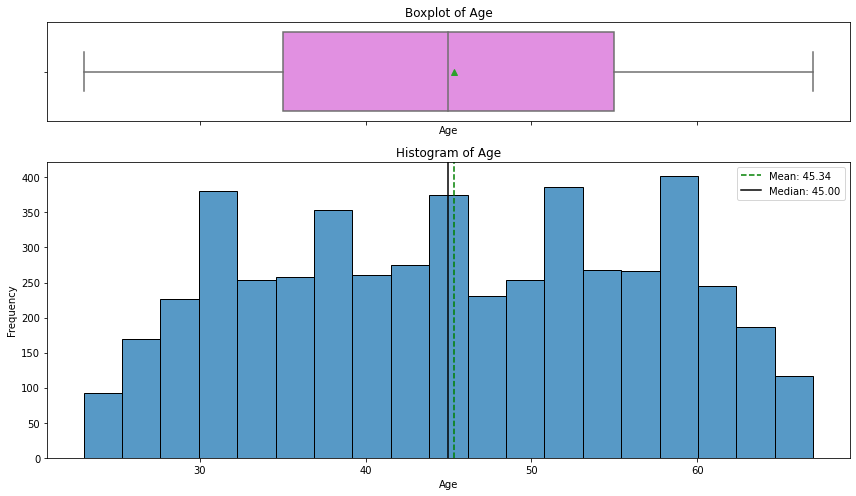

In [23]:
histogram_boxplot(data, "Age")

The Average Age is 45 Years old - Data seems to be slightly fitting a uniform distribution.

There are no outliers observed.

In [24]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

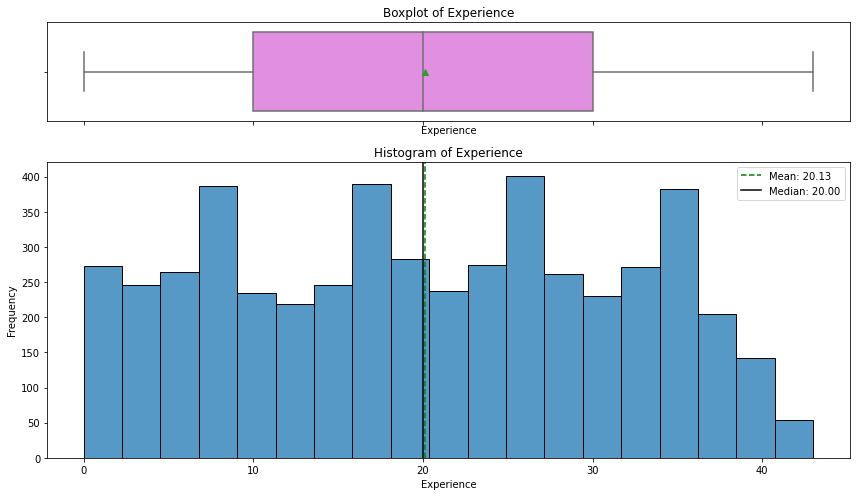

In [25]:
histogram_boxplot(data, "Experience")

The mean Experience is approximatly 20 years.
The data is almost fitting a uniform distribution.
There are no outliers observed

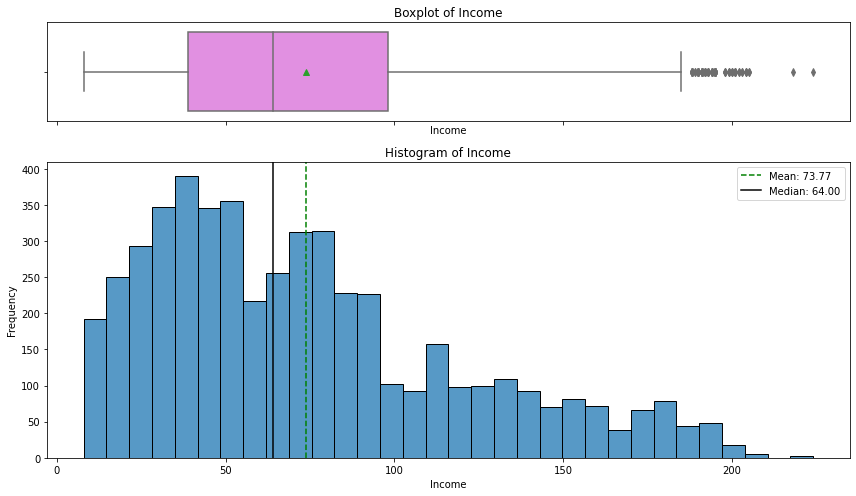

In [26]:
histogram_boxplot(data, "Income")

The average income is USD 64K - Dataset is right skewed
There is a number of outliers, yet they seem consistent with the data hence no action is required for outlier treatment

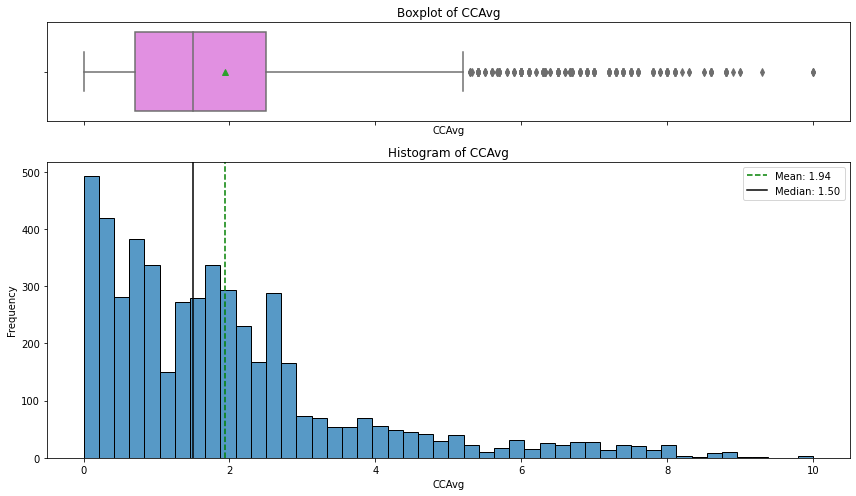

In [27]:
histogram_boxplot(data, "CCAvg")

The average spending on credit cards per month is approx USD 1.9K
Dataset is right skewed with a number of outliers that seem homogenous with the data, hence no action required for the outliers

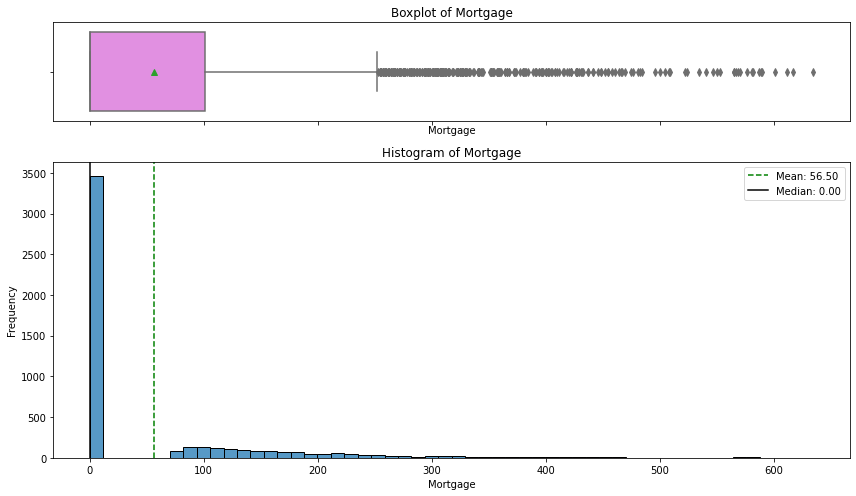

In [28]:
histogram_boxplot(data, "Mortgage")

The min Mortgage is USD 0k, max is USD 635K and average is USD 0K. The Dataset is heavily right skewed
To visualize better, we will separate the USD 0k mortgage from the > USD 0K mortgage and plot the data again

In [29]:
#extracting the customers with mortgage values > 0 
mortgage = data[data['Mortgage']>0]
print(f'There are {len(mortgage)} customers under mortgage and forms {round((len(mortgage)/5000)*100)}% of the dataset')

There are 1538 customers under mortgage and forms 31% of the dataset


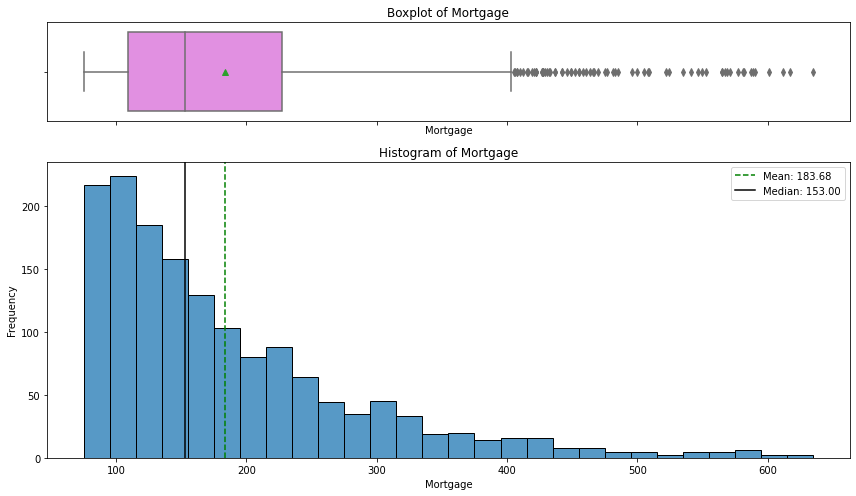

In [30]:
#plotting the mortgage of the customers
histogram_boxplot(mortgage,'Mortgage')

The mortgage distibution of the customers under mortgage is right skewed with a minimum value of approx 99K to max value of 635K and mean value around USD 184K.

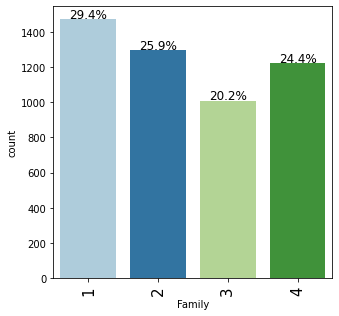

In [31]:
labeled_barplot(data, "Family", perc=True)

The majority of Family sizes (29.4%) is size 1, followed by (25.9%) of size 2 then (24.4%) of size 4 and finally (20.2%) of size 3.

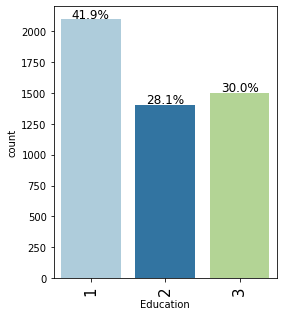

In [32]:
labeled_barplot(data,"Education",perc=True)

* 41.9% of customers are 1: Undergrad
* 28.1% of customers are 2: Graduate
* 30.0% of customers are 3: Advanced/Professional

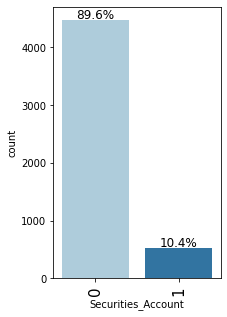

In [33]:
labeled_barplot(data,"Securities_Account",perc=True)

* 89.6 % customers have securities account 
* 10.4 % customers do not have securities account

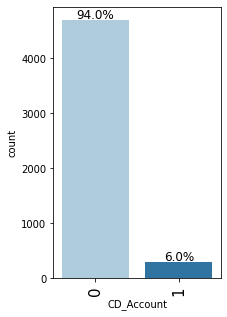

In [34]:
labeled_barplot(data,"CD_Account",perc=True)

* 94% of customers do not have a CD_Account.
* 6% only have a CD_Account

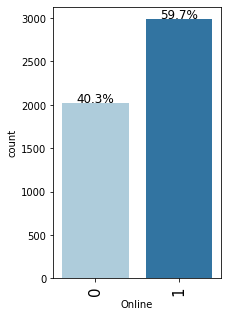

In [35]:
labeled_barplot(data,"Online",perc=True)

* 59.7% of customers use the online banking services
* 40.3% of customers do not use the online banking services

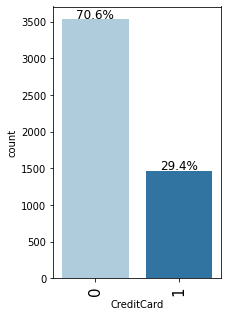

In [36]:
labeled_barplot(data,"CreditCard",perc=True)

* 70.6% of customers do not use a credit card issued by a different bank
* 29.4% of customers use a credit card issued by a different bank

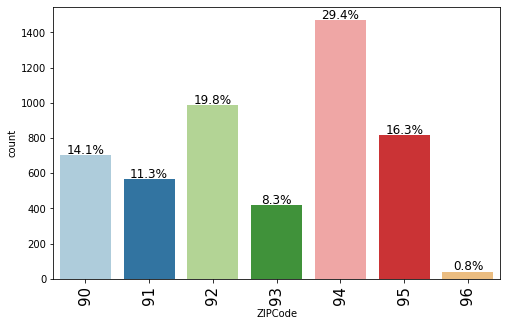

In [37]:
labeled_barplot(data,"ZIPCode",perc=True)

* 29.4 % customers are from ZipCodes starting from 94. 
* 19.8 % customers are from ZipCodes starting from 92.
* 16.3 % customers are from ZipCodes starting from 95.
* Other ZIPCodes have 8-14 % customers except the ZIPCodes starting from 96 which have least customers.

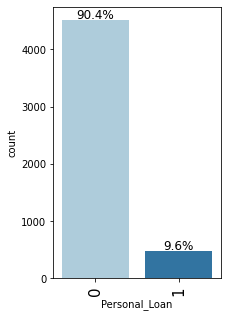

In [38]:
labeled_barplot(data,'Personal_Loan',perc=True)

* 90.4% of customers Did not accept a loan
* 9.6% of customers accepted a loan
* Note! This mismatch needs to be considered while training the model

### Bivariate Analysis

In [39]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [40]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

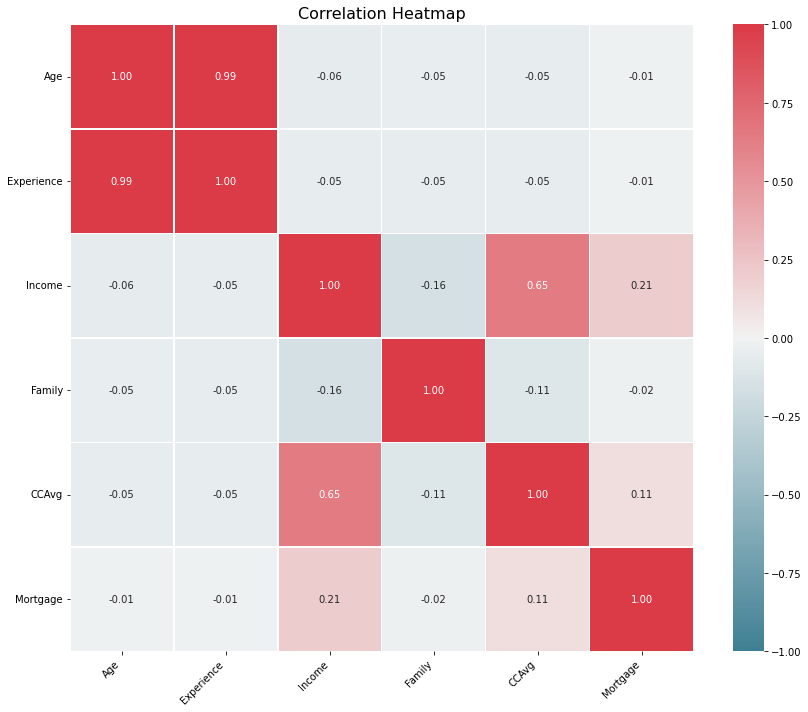

In [41]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap=cmap, 
            vmin=-1, 
            vmax=1, 
            linewidths=.5)

# Add titles and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

The correlation heatmap shows:

The correlation between Age and Experience is very high (value = 0.99)
The correlation between Income and CCAvg is low (value = 0.65)
All other correlation values are quiet small for consideration

<Figure size 1080x1080 with 0 Axes>

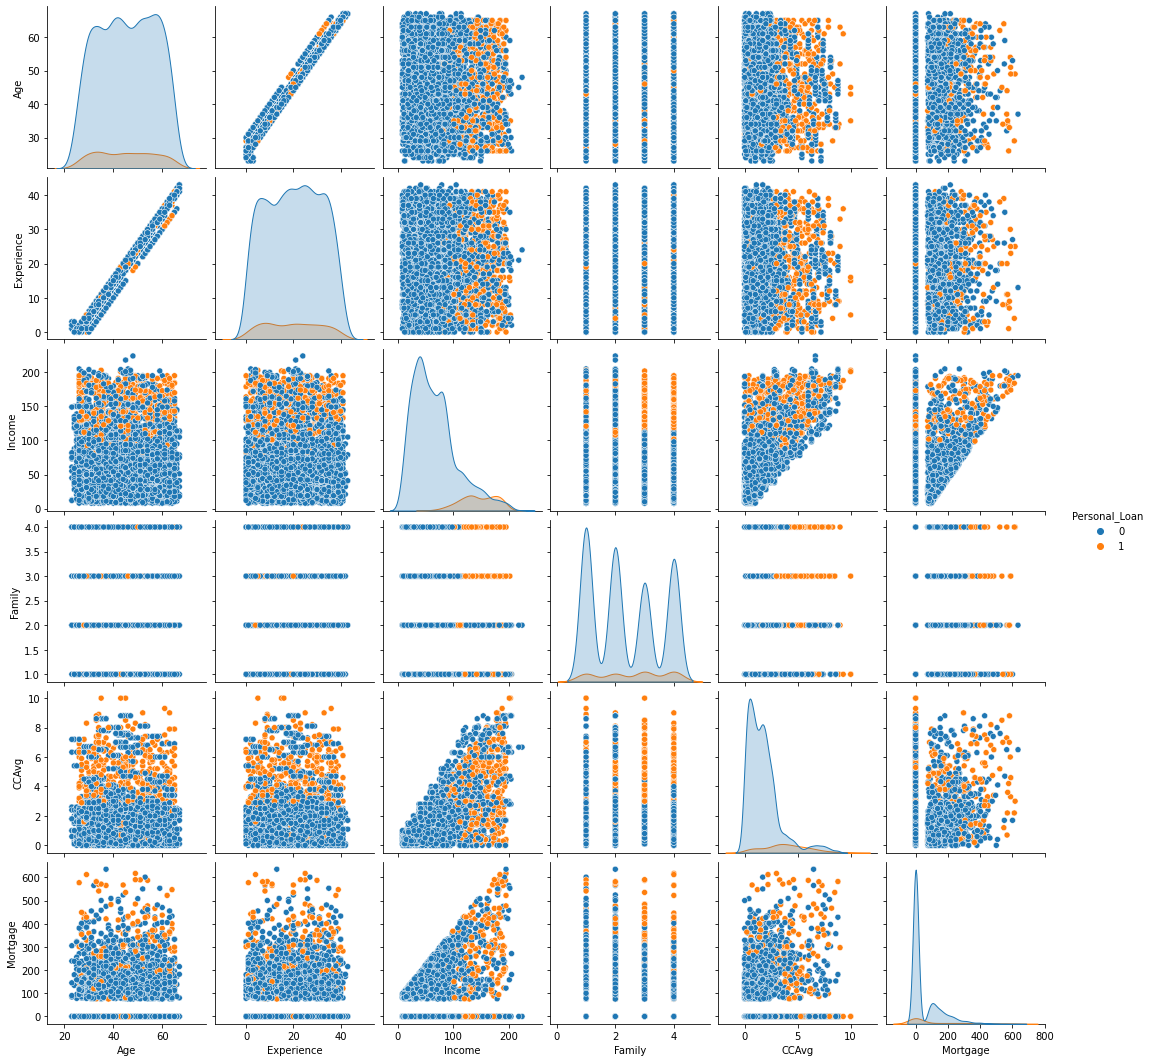

In [42]:
plt.figure(figsize=(15,15))
sns.pairplot(data, hue="Personal_Loan")
plt.show()

Observations:

* The orange spots present the customers who accepted a personal_loan and the blue spots show the ones who did not.
* From the univariate analysis of the personal_loan dataset it was observed that only 9.6% of the customers accepted the personal loan, hence this observation is consistent with the pair plot where the majority of the spots are blue
* It is observed that there is a very strong linear corelation between Age and Experience
* It is observed that there is a slight correlation between Income and CCAvg
* High concentraion of customers who accepted a personal loan are observed at:
* Higher Income level (starting at approx USD 100K and above)
* Higher CCAvg (starting at approx USD 3K and above)
* Higher Mortgage value (starting at approx USD 300K and above)

Hence, we do have an idea to expect the above variables to have a medium to high prediction power on the classification models.

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


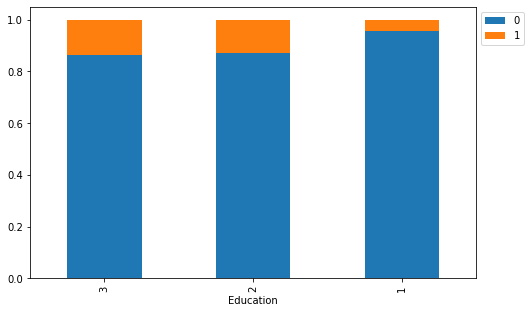

In [43]:
stacked_barplot(data, "Education", "Personal_Loan")

It is observed that customers with education level 2 and 3 are more willing to accept a personal loan that education level 1.

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


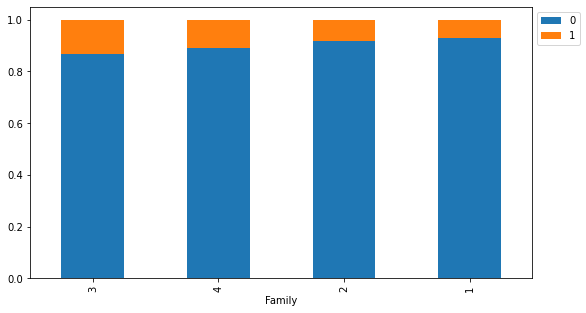

In [44]:
stacked_barplot(data, "Family", "Personal_Loan")

It is observed that famillies of size 3 or 4 have more proportion of accepting a personal loan. Hence as the familly size grows, customers are more willing to accept personal loans

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


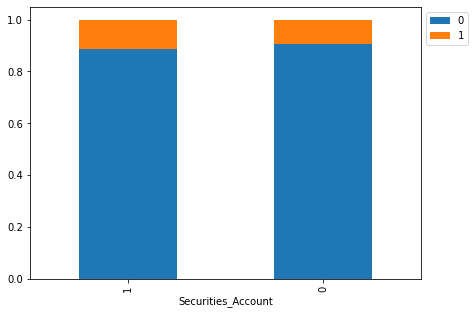

In [45]:
stacked_barplot(data, "Securities_Account", "Personal_Loan")

It is observed that customers with and without Security account are almost likely to accept a personal loan

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


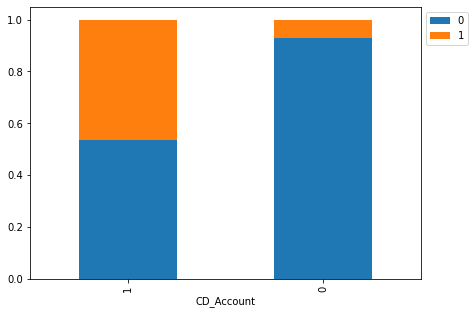

In [46]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

It is observed that customers with CD_account are more willing to accept a personal loan

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


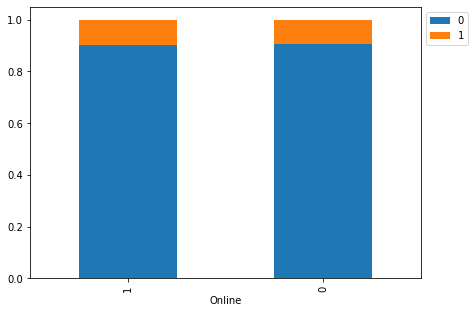

In [47]:
stacked_barplot(data, "Online", "Personal_Loan")

It is observed that customers who use internet banking services and who do not use internet banking services are almost equally likely to accept personal loans

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


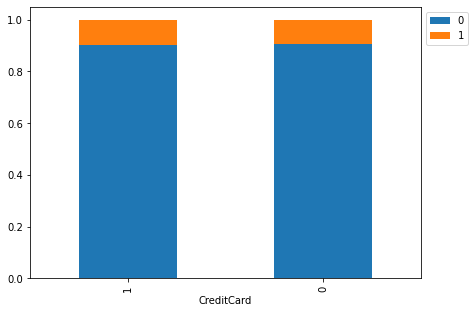

In [48]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

It is observed that customers who use credit cards issued by other banks and those who do not are almost equally likely to accept personal loans

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


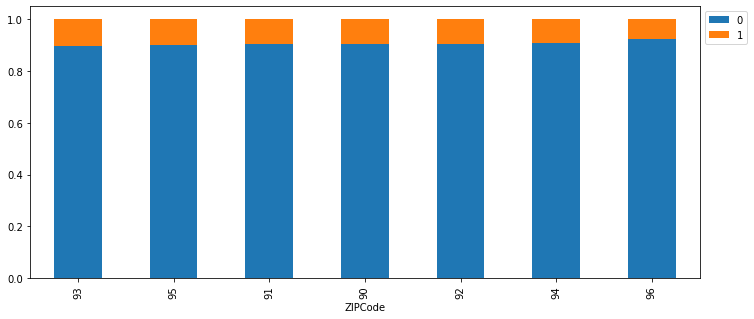

In [49]:
stacked_barplot(data, "ZIPCode", "Personal_Loan")

It is observed that customers who live in different ZIPCodes are almost equally likely to accept personal loans

#### Let's check how a customer's interest in purchasing a loan varies with their age

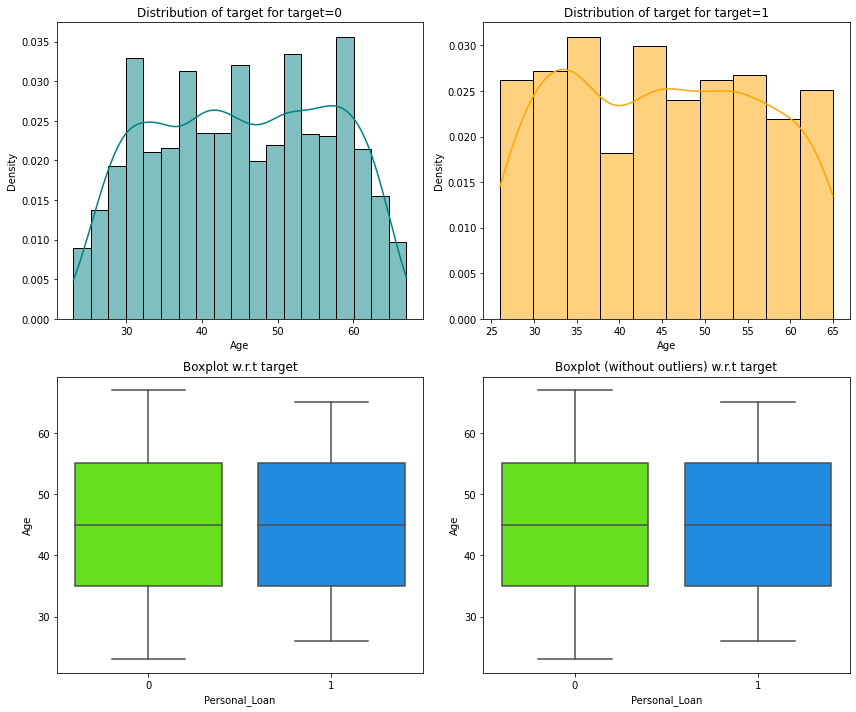

In [50]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

It is observed that the mean age for customers accepting and not accepting personal loans is very close to the value 45 years. However, the age-range of customers accepting and not accepting loan are different.  

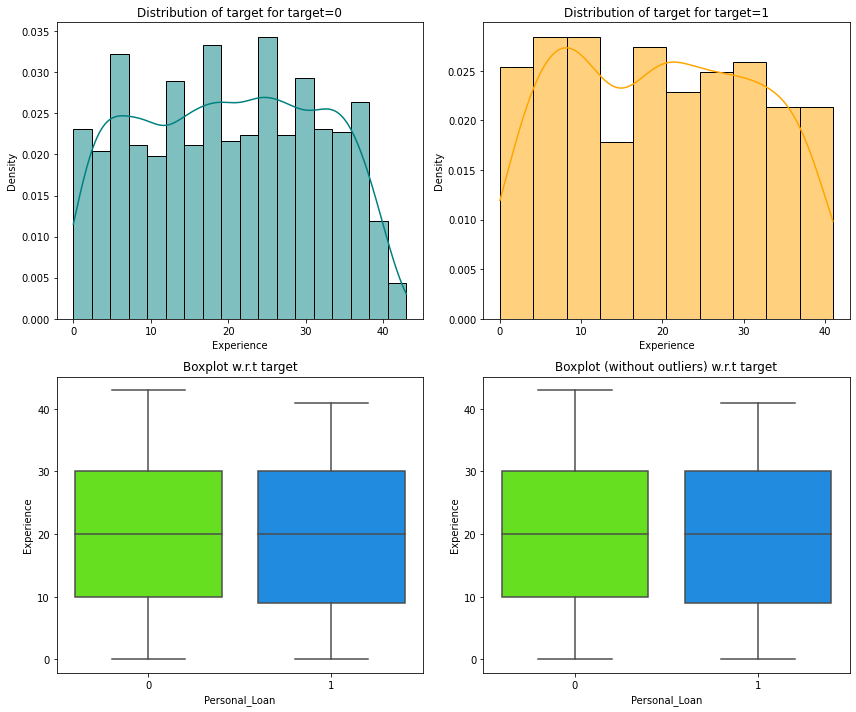

In [51]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

It is observed that the mean Experience for customers accepting and not accepting personal loans is very close to the value 20 years. Experience does not have much relation with loan. 

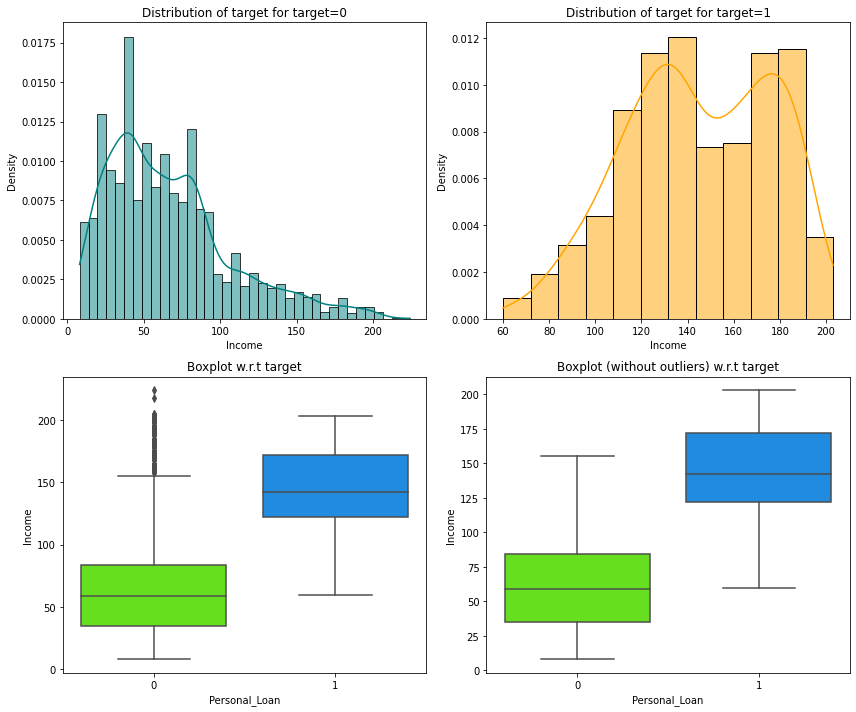

In [52]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

As expected, The Income variable varies greatly between customers who accepted and not accepted the personal loan.
The mean income for the customers who did not accept the loan is approx USD 65K
The mean income for the customers who did accept the loan is approx USD 145K
This shows that the income level of the customer has a high impact on the customer decision to accept a personal loan, The higher the income, the more chances the customer will accept a personal loan

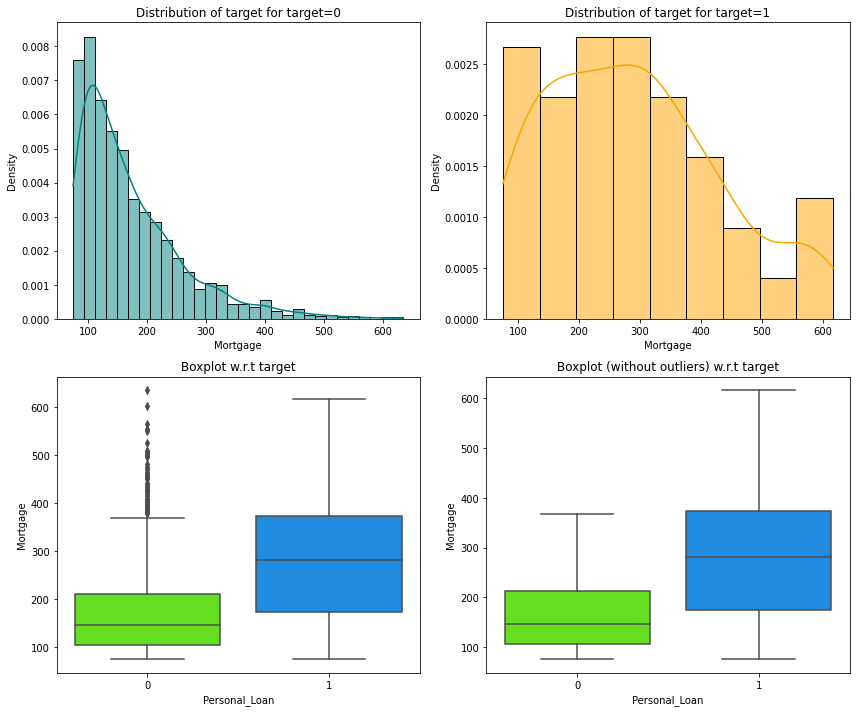

In [53]:
distribution_plot_wrt_target(mortgage,'Mortgage','Personal_Loan')

It is observed that the mean value of mortgage paid by customers not accepting a personal loan is approx USD 150K USD which is much less than the mean value of customers accepting personal loan of approx USD 290K. 

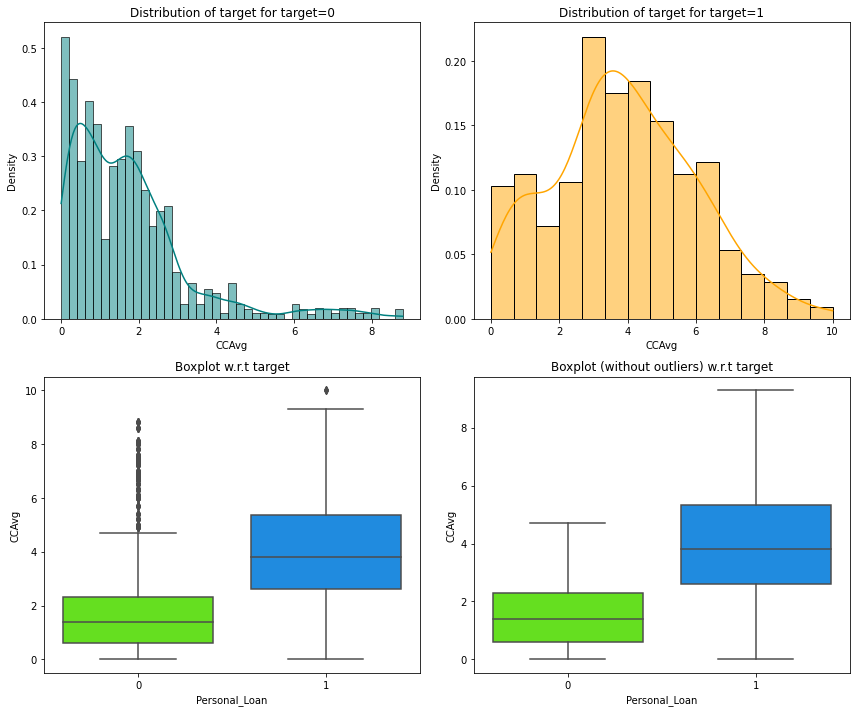

In [54]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

It is observed that the mean value of CCAvg of customers not accepting a personal loan is approx USD 1.6 K USD which is much less than the mean value of customers accepting personal loan of approx USD 4K. hence customers who accept personal loan spends more money on monthly basis

### Key Observations from Univariate Analysis: 
* The min Age is 23 , max is 67 , Average is 45 Years old - Data seems is slightly fitting a uniform distribution.
* The min Experience is 0 years, the max is 43 and the mean is approximatly 20 years.
* The min CCAvg is USD 0k (which can be reflecting customers who do not own credit cards), max is USD 1.9K and average is USD 10K
* 369% of the customers are not paying mortage and the remainig 31% paying minimum value of approx 99K to max value of 635K and mean value between USD 180-200K for mortage
* The majority of Family sizes (29.4%) is size 1, followed by (25.9%) of size 2 then (24.4%) of size 4 and finally (20.2%) of size 3.
* Customer Education is distributed as follow:
* 41.9% of customers are 1: Undergrad
* 28.1% of customers are 2: Graduate
* 30.0% of customers are 3: Advanced/Professional
* A total of 94% of customers Do Not have a CD_Account and 6% only have a CD_Account
* A total of 40.3% of customers do not use the online banking services and 59.7% do.
* A total of 70.6% of customers do not hold a credit card and 29.4% of customers hold credit cards,
* The target variable Personal_Loan shows 90.4% of customers Did not accept a loan and 9.6% of customers accepted a loan

### Key Insights and Observations on the multivariate analysis:

#### Correlation between variables
* The correlation between Age and Experience is very high (value = 0.98)
* The correlation between Income and CCAvg is low (value = 0.65)
* All other correlation values are quiet small for consideration
#### The effect of variables on the target variable
* The higher the income, the more chances the customer will accept a personal loan
* As familly size grows, customers are more willing to accept personal loans
* As the monthly spending of customers increase, the more they are willing to accept personal loan
* As the Education level of the customers increase, they are more willing to accept a personal loan
* ZIPCodes has no observed effect on target variable 
* Customers with CD_account are more willing to accept a personal loan
* Online (customers who use internet banking) has no observed effect on the target variable


#### Low importance is expected for the variables: Age, Experience, Credit card, Online, Mortgage, Security Account
#### High to medium importance is expected for Income, Familly, CCAvg, Education, CD_account

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
* Answer: The distribution is heavily right skewed due to the high number of customers not paying mortgage. Yes there were outliers in the data. The mean value of mortgage paid by customers not accepting a personal loan is much less than the mean value of mortgage paid by customers accepting personal loan.
2. How many customers have credit cards?
* Answer: A total of 70.6% of customers do not hold a credit card and 29.4% of customers hold credit cards.
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
* Answer: Income, Family size, CCAvg, Education and CD_account have strong correlation with the target variable.
4. How does a customer's interest in purchasing a loan vary with their age?
* Answer: The mean age of customers accepting or not accepting loan are the same. However, the range of age of customers who accept loan lies in the range of 25 to 65 years. 
5. How does a customer's interest in purchasing a loan vary with their education?
* Answer: Customers with education level 2 and 3 are more willing to accept a personal loan that education level 1

## Data Preprocessing (contd.)

### Data Prepartion for Modeling

In [55]:
# dropping Experience as it is perfectly correlated with Age
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)
X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [56]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


As observed earlier on as well in the univariate analysis, the class 1 proportion is only 9.5% of the data set.

## Model Building

### Model Evaluation Criterion

*Predicting a customer will accept a loan but in reality the customer would not accept a loan. - Loss of resources

*Predicting a customer will not accept a loan but in reality the customer would have accepted a loan. - Loss of opportunity


### The more important case is:
If we predict a customer who was going to accept a loan as a customer who will not accept a loan - loss of opportunity (FN)

recall should be maximized, the greater the recall higher the chances of minimizing the false negatives.

In [57]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [58]:
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

### Model Building

In [59]:
# creating an instance of the decision tree model
dtree1 = DecisionTreeClassifier(criterion="gini",class_weight={0: 0.094571, 1: 0.905429}, random_state=1)    # random_state sets a seed value and enables reproducibility

# fitting the model to the training data
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.094571, 1: 0.905429}, random_state=1)

## Model Evaulation

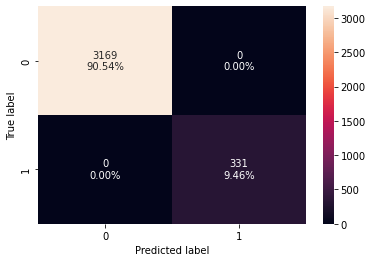

In [60]:
plot_confusion_matrix(dtree1, X_train, y_train)

In [61]:
dtree1_train_perf = model_performance_classification(
    dtree1, X_train, y_train
)
dtree1_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


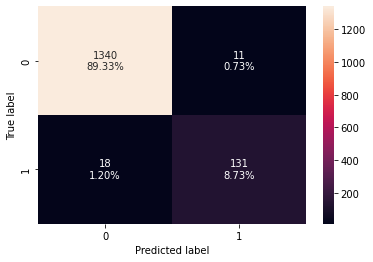

In [62]:
plot_confusion_matrix(dtree1, X_test, y_test)

In [63]:
dtree1_test_perf = model_performance_classification(
    dtree1, X_test, y_test
)
dtree1_test_perf

,Accuracy,Recall,Precision,F1
0,0.980667,0.879195,0.922535,0.900344


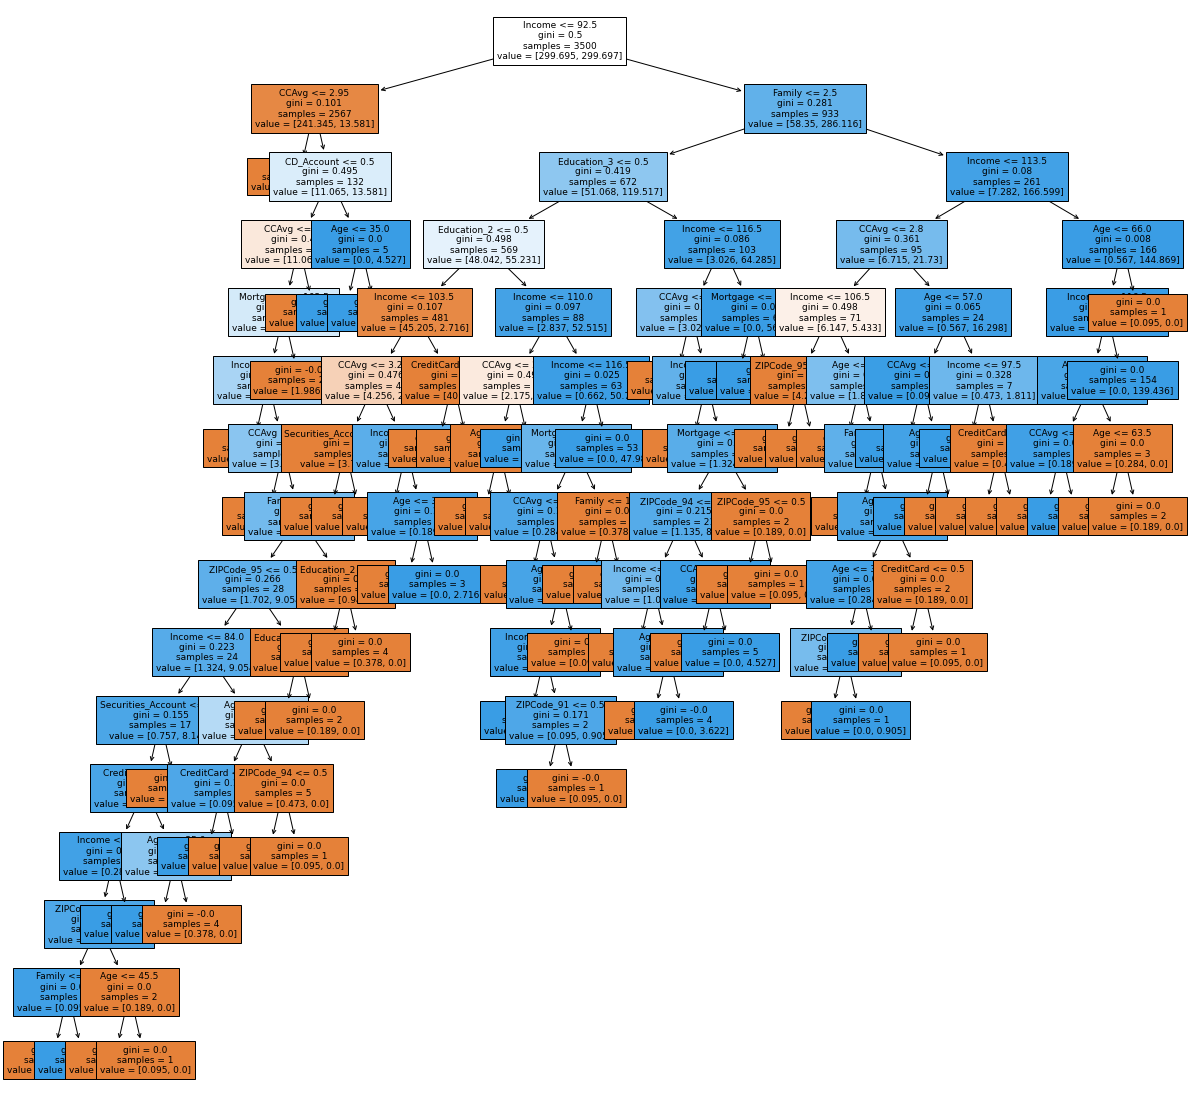

In [64]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree1,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

Very complex decision tree. Need to prune this.

In [65]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree1,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [230.28, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [1.42, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [1.04, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- ZIPCode_95 <= 0.50
|   |   |   |   |   |   |   |   |   |--- Income <= 84.00
|   |   |   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- Securities_Account >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.09, 0.00] class: 0
|   |   |   |   |   |   |   | 

In [66]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dtree1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.642504
Education_2         0.136399
CCAvg               0.089649
Education_3         0.048025
Family              0.045744
Age                 0.015480
Mortgage            0.007543
CD_Account          0.007459
ZIPCode_92          0.002546
ZIPCode_95          0.001854
CreditCard          0.001055
ZIPCode_94          0.000636
ZIPCode_91          0.000571
Securities_Account  0.000534
Online              0.000000
ZIPCode_93          0.000000
ZIPCode_96          0.000000


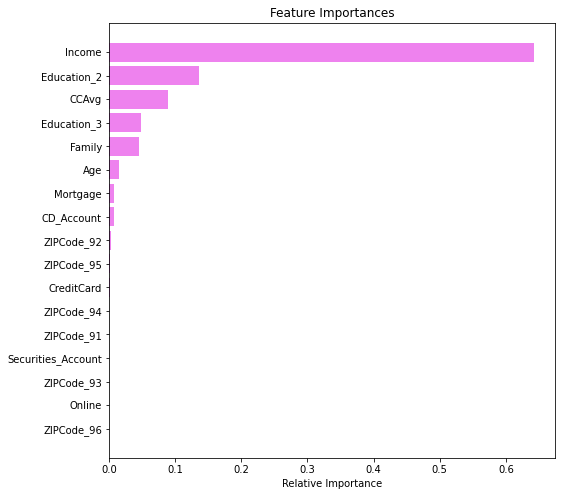

In [67]:
importances = dtree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Income, Family, Education, CCAvg are the top 4 important features. Age, Mortgage and CD_account are medium importance features.
The default decision treem model overfits the data and hence gives the highest score of 1 on recall, accuracy,F1 and precision
Likewise for testing set, the performance scores are high due to the overfitting scenario. But the Recall_test score is low.

## Model Performance Improvement

## Decision Tree (pre-pruning)

In [68]:
# Choose the type of classifier.
dtree2 = DecisionTreeClassifier(random_state=1, class_weight={0: 0.094571, 1: 0.905429})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, 20, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
    'max_leaf_nodes' : [2, 3, 5, 10],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree2, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree2 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.094571, 1: 0.905429},
                       criterion='entropy', max_depth=5, max_leaf_nodes=3,
                       min_impurity_decrease=1e-05, random_state=1)

#### Hyper parameters for decision tree(pre-pruning):

max_depth = 5,
Criterion = Entropy,
remaining paramaters : Keep as default

In [69]:
dtree2 = DecisionTreeClassifier(random_state=1,max_depth=5, criterion='entropy'
                             , class_weight={0: 0.094571, 1: 0.905429})

In [70]:
dtree2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.094571, 1: 0.905429},
                       criterion='entropy', max_depth=5, random_state=1)

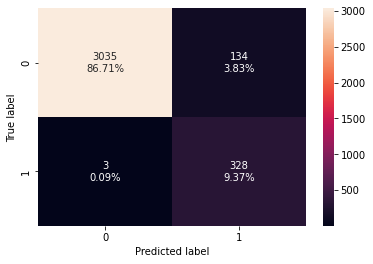

In [71]:
plot_confusion_matrix(dtree2, X_train, y_train)

In [72]:
dtree2_train_perf = model_performance_classification(
    dtree2, X_train, y_train
)
dtree2_train_perf

,Accuracy,Recall,Precision,F1
0,0.960857,0.990937,0.709957,0.827238


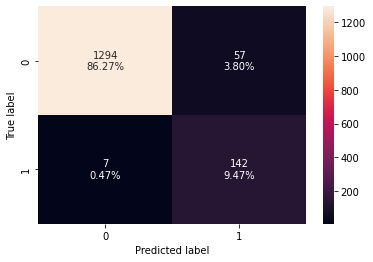

In [73]:
plot_confusion_matrix(dtree2, X_test, y_test)

In [74]:
dtree2_test_perf = model_performance_classification(
    dtree2, X_test, y_test
)
dtree2_test_perf

,Accuracy,Recall,Precision,F1
0,0.957333,0.95302,0.713568,0.816092


The model performs well on the testing set with a recall of around 0.95

In [75]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


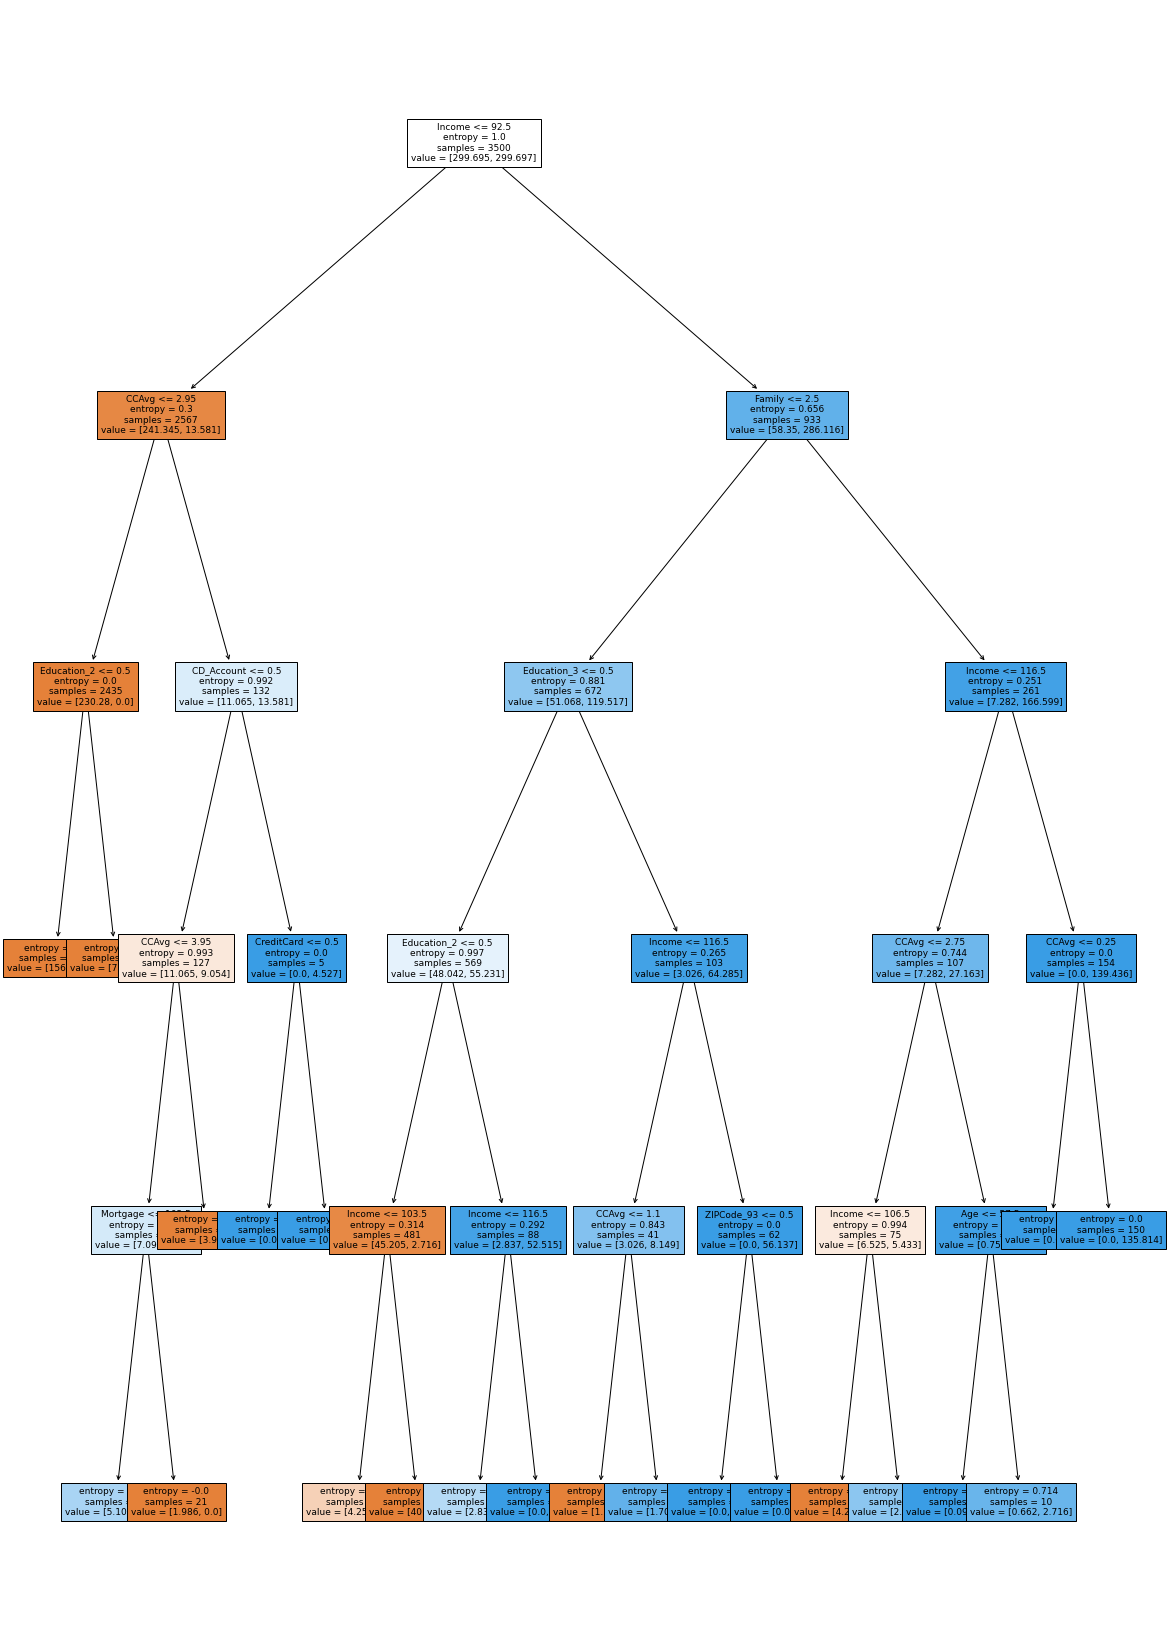

In [76]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dtree2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [77]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree2,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- Education_2 <= 0.50
|   |   |   |--- weights: [156.42, 0.00] class: 0
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [73.86, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- weights: [5.11, 9.05] class: 1
|   |   |   |   |--- Mortgage >  102.50
|   |   |   |   |   |--- weights: [1.99, 0.00] class: 0
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [3.97, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- CreditCard <= 0.50
|   |   |   |   |--- weights: [0.00, 2.72] class: 1
|   |   |   |--- CreditCard >  0.50
|   |   |   |   |--- weights: [0.00, 1.81] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 103.50
|   |   |   |   |   |--- weights: [4.26, 2.72] class: 0
|   |   |   |

In [78]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dtree2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                             Imp
Income              6.221524e-01
Education_2         1.290525e-01
CCAvg               1.221962e-01
Family              5.805141e-02
Education_3         5.305620e-02
CD_Account          8.074140e-03
Mortgage            4.711449e-03
Age                 2.705663e-03
ZIPCode_93          3.236215e-17
CreditCard          2.348866e-17
Online              0.000000e+00
ZIPCode_91          0.000000e+00
ZIPCode_92          0.000000e+00
ZIPCode_94          0.000000e+00
ZIPCode_95          0.000000e+00
ZIPCode_96          0.000000e+00
Securities_Account  0.000000e+00


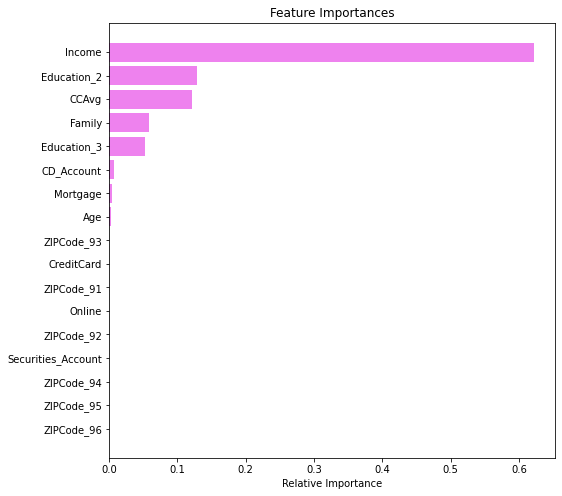

In [79]:
importances = dtree2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

dtree2 performs better than dtree1 in terms of recall test score. Income, Education, CCAvg and Family are top features. CD_account, Mortgage and Age are low priority features.

### Further tuning of decision tree(pre-pruning):

In [80]:
#Choose the type of classifier.
dtree3 = DecisionTreeClassifier(random_state=1,max_depth=5, criterion='entropy'
                             , class_weight={0: 0.094571, 1: 0.905429},max_leaf_nodes=3,
                       min_impurity_decrease=1e-05)

In [81]:
dtree3.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.094571, 1: 0.905429},
                       criterion='entropy', max_depth=5, max_leaf_nodes=3,
                       min_impurity_decrease=1e-05, random_state=1)

In [82]:
dtree3_train_perf = model_performance_classification(
    dtree3, X_train, y_train
)
dtree3_train_perf

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


In [83]:
dtree3_test_perf = model_performance_classification(
    dtree3, X_test, y_test
)
dtree3_test_perf

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


dtree3 seems to overfit the data

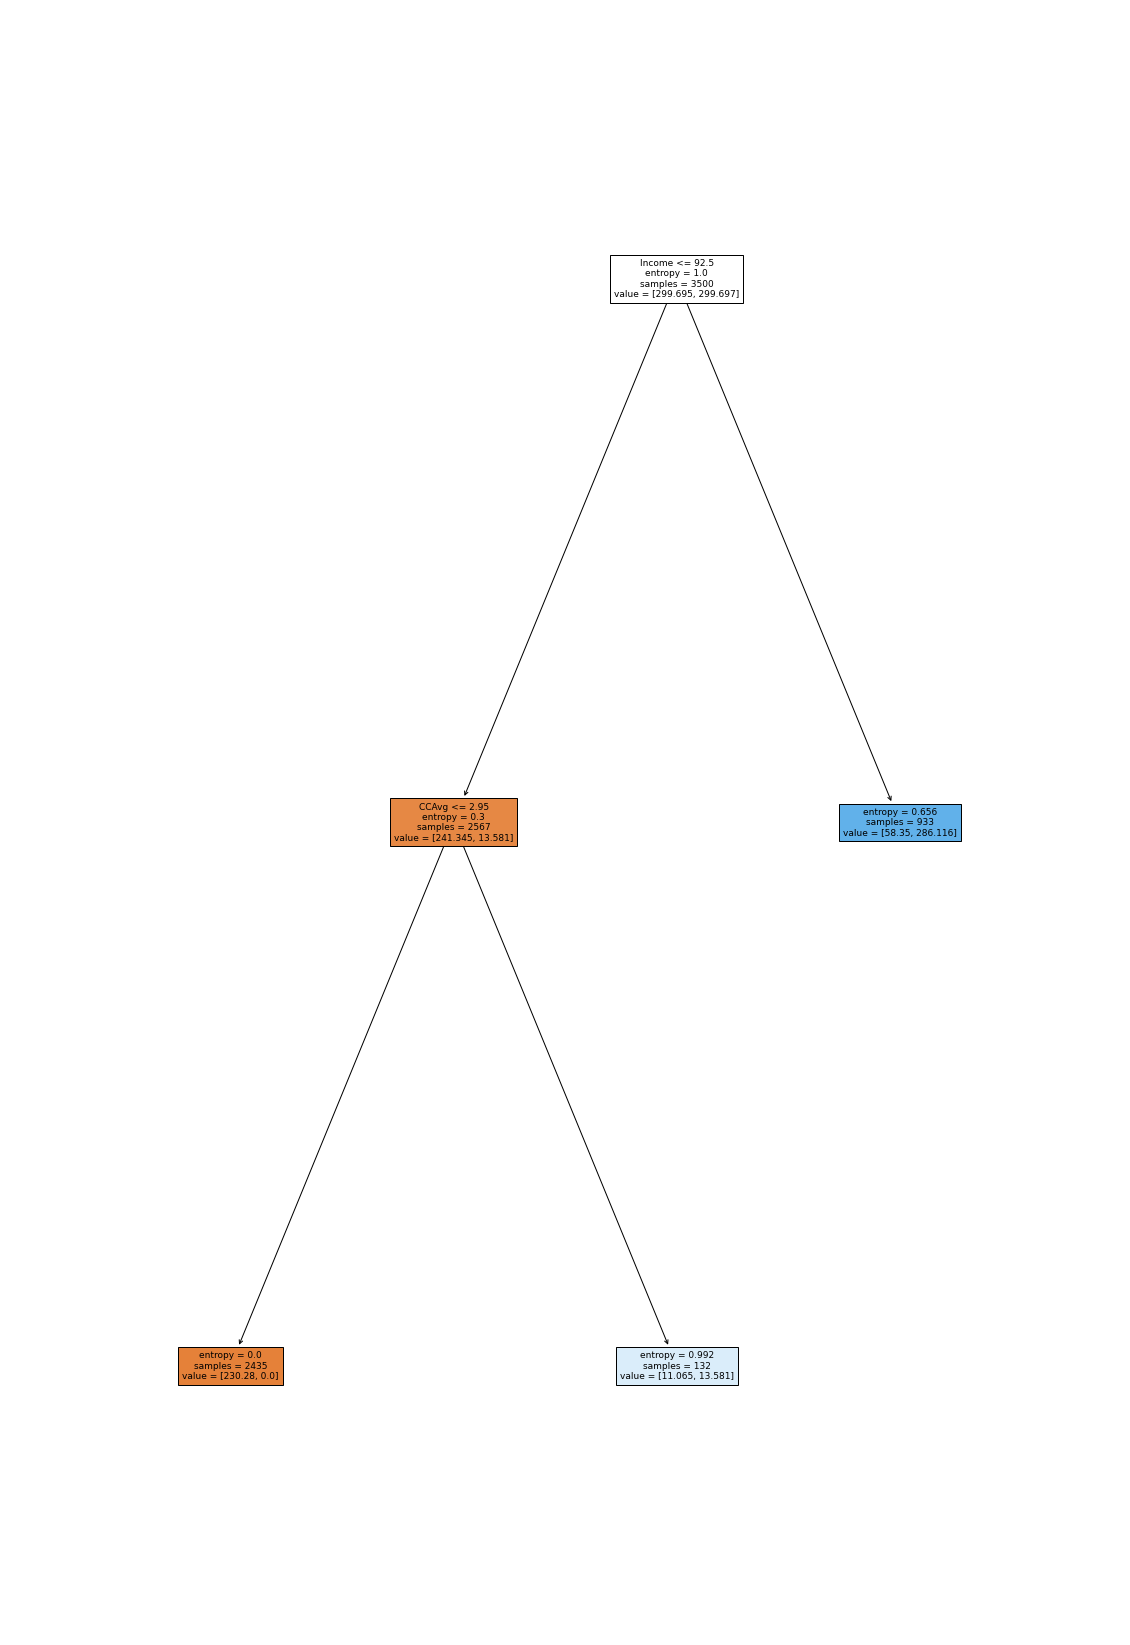

In [84]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dtree3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [85]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dtree3.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.850779
CCAvg               0.149221
Age                 0.000000
ZIPCode_92          0.000000
Education_2         0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000
ZIPCode_94          0.000000
ZIPCode_93          0.000000
CreditCard          0.000000
ZIPCode_91          0.000000
Online              0.000000
CD_Account          0.000000
Securities_Account  0.000000
Mortgage            0.000000
Family              0.000000
Education_3         0.000000


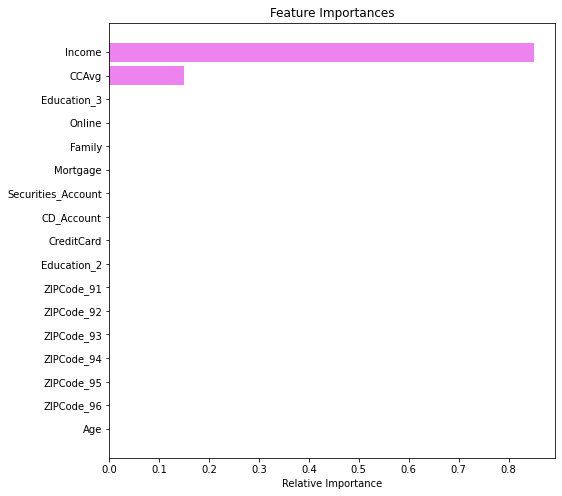

In [86]:
importances = dtree3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

dtree3 only gives Income and CCAvg to be important features.

In [87]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree1_train_perf.T, dtree2_train_perf.T, dtree3_train_perf.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree1 (Pre-Pruning)", "Decision Tree2 (Pre-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree1 (Pre-Pruning),Decision Tree2 (Pre-Pruning)
Accuracy,1.0,0.960857,0.790286
Recall,1.0,0.990937,1.000000
Precision,1.0,0.709957,0.310798
F1,1.0,0.827238,0.474212


In [88]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [dtree1_test_perf.T, dtree2_test_perf.T, dtree3_test_perf.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree1 (Pre-Pruning)", "Decision Tree2 (Pre-Pruning)"]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree1 (Pre-Pruning),Decision Tree2 (Pre-Pruning)
Accuracy,0.980667,0.957333,0.779333
Recall,0.879195,0.953020,1.000000
Precision,0.922535,0.713568,0.310417
F1,0.900344,0.816092,0.473768


The best performing pre-pruning decision tree model is dtree2. 
Income, Education, Family and CCAvg are top 4 features. CD_Account and Mortgage are low priority features. We observe a simpler tree after pre-pruning

## Decision Tree (post-pruning)

In [89]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(class_weight={0: 0.094571, 1: 0.905429},random_state=1)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [90]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-2.549700e-16
1,8.758443e-20,-2.548824e-16
2,1.156114e-18,-2.537263e-16
3,1.156114e-18,-2.525701e-16
4,1.541486e-18,-2.510287e-16
5,1.576520e-18,-2.494521e-16
6,1.629070e-18,-2.478231e-16
7,2.452364e-18,-2.453707e-16
8,2.802702e-18,-2.425680e-16
9,2.977871e-18,-2.395901e-16


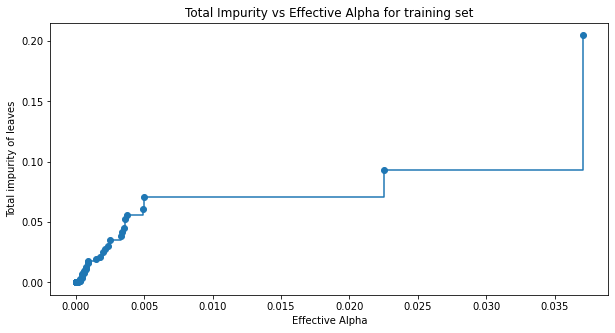

In [91]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

Impurities show a peak at alpha = approx. 0.005

### Let us see how the effective alphas and the tree depth vary with alpha

In [92]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=1)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.2953794476658216


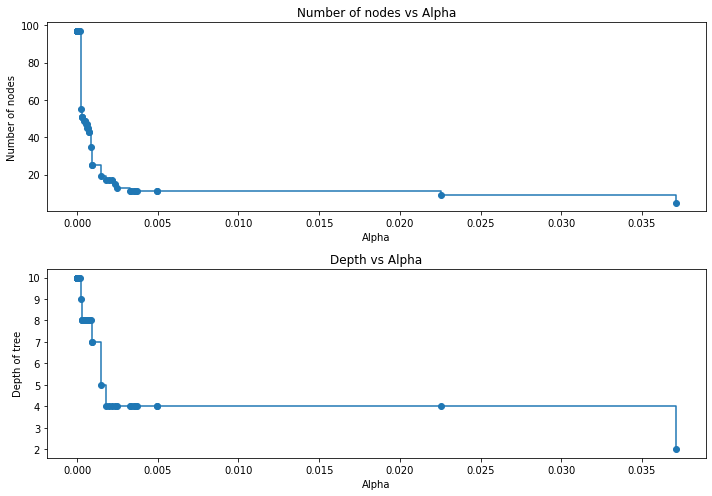

In [93]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

It is observed that again at around alpha = 0.005 the tree seems to have reached very small size. The optimal value of alpha seems to be below 0.005   

### Now, let us observe how are the recall values at varying alphas for the training and test sets

In [94]:
recall_train = []  # Initialize an empty list to store recall scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    # Calculate the recall score for the training set predictions compared to true labels
    values_train = recall_score(y_train, pred_train)

    # Append the calculated recall score to the recall_train_scores list
    recall_train.append(values_train)

In [95]:
recall_test = []  # Initialize an empty list to store recall scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the recall score for the test set predictions compared to true labels
    values_test = recall_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    recall_test.append(values_test)

In [96]:
print(len(ccp_alphas), len(recall_train), len(recall_test))

49 49 49


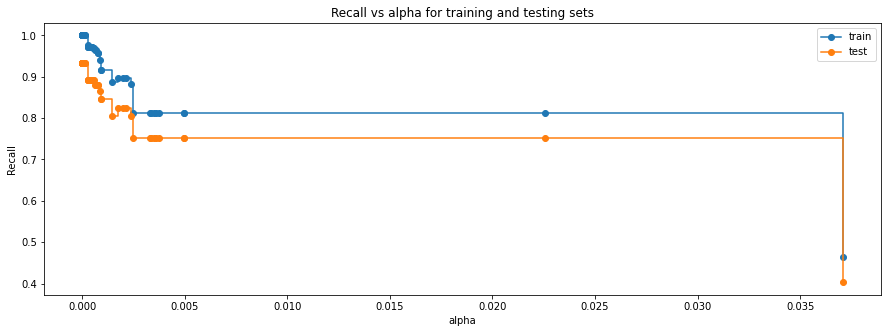

In [97]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

we observe a better performance at alpha around 0.001-0.002. Visually the value of alpha giving the best accuract is either very close to zero which could be still reflecting an over fitting tree. We can take alpha around 0.003. 

In [98]:
#creating a data frame including alpha, recall train and recall test
df = pd.DataFrame()
df[['ccp_alphas', 'recall_train', 'recall_test']]=''
df['ccp_alphas']=ccp_alphas
df['recall_train']= recall_train
df['recall_test']=recall_test
df

,ccp_alphas,recall_train,recall_test
0,0.000000e+00,1.000000,0.932886
1,8.758443e-20,1.000000,0.932886
2,1.156114e-18,1.000000,0.932886
3,1.156114e-18,1.000000,0.932886
4,1.541486e-18,1.000000,0.932886
5,1.576520e-18,1.000000,0.932886
6,1.629070e-18,1.000000,0.932886
7,2.452364e-18,1.000000,0.932886
8,2.802702e-18,1.000000,0.932886
9,2.977871e-18,1.000000,0.932886


In [99]:
best_ccp_alpha=df.iloc[40][0]
best_ccp_alpha

0.003297255431178324

In [100]:
dtree4 = DecisionTreeClassifier(
    ccp_alpha=best_ccp_alpha,class_weight={0: 0.094571, 1: 0.905429}, random_state=1         ## Complete the code by adding the correct ccp_alpha value
)
dtree4.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.003297255431178324,
                       class_weight={0: 0.094571, 1: 0.905429}, random_state=1)

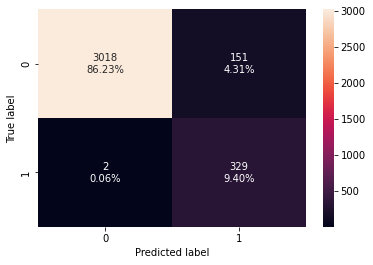

In [101]:
plot_confusion_matrix(dtree4,X_train,y_train)

In [102]:
dtree4_train_perf = model_performance_classification(
    dtree4, X_train, y_train
)
dtree4_train_perf

,Accuracy,Recall,Precision,F1
0,0.956286,0.993958,0.685417,0.811344


In [103]:
dtree4_test_perf = model_performance_classification(
    dtree4, X_test, y_test
)
dtree4_test_perf

,Accuracy,Recall,Precision,F1
0,0.946667,0.973154,0.656109,0.783784


The model performs well on the testing set with a recall of 0.97

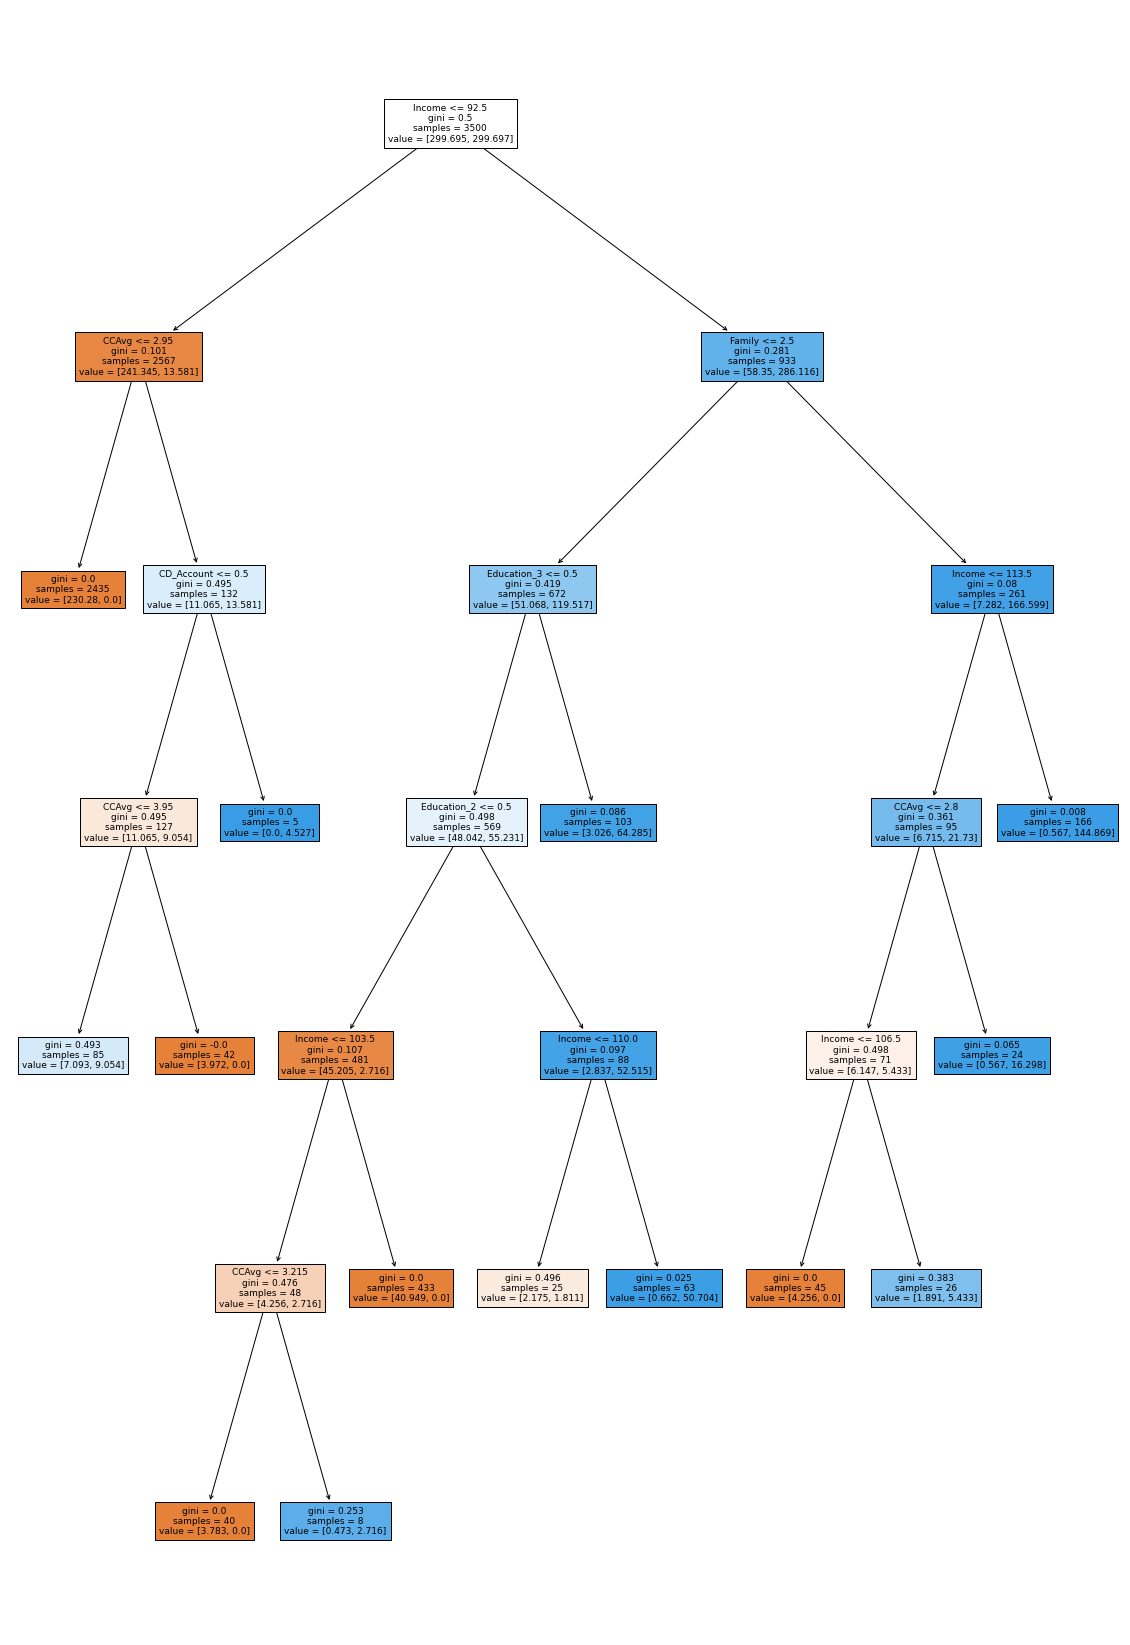

In [104]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dtree4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [105]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree4,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [230.28, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [7.09, 9.05] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [3.97, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 4.53] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 103.50
|   |   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |   |--- weights: [3.78, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |   |--- weights: [0.47, 2.72] class: 1
|   |   |   |   |--- Income >  103.50
|   |   |   |   |   |--- weights: [40.95, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- Income <= 110.00
|   |   |   |   |   |--- weights: [2.18, 1.81] class: 0
|   |   |   |   |--- Income >  1

                         Imp
Income              0.673615
Education_2         0.147661
CCAvg               0.077413
Education_3         0.051990
Family              0.041246
CD_Account          0.008075
ZIPCode_93          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000
ZIPCode_94          0.000000
Age                 0.000000
ZIPCode_92          0.000000
ZIPCode_91          0.000000
Online              0.000000
Securities_Account  0.000000
Mortgage            0.000000
CreditCard          0.000000


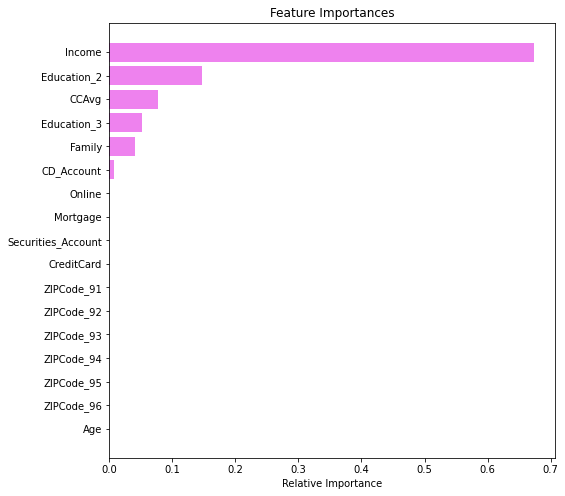

In [106]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dtree4.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)
importances = dtree4.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Income, Family, Education and CCAvg are now the top 4 important features after post pruning.
CD_Account has low predictability.

## Model Performance Comparison and Final Model Selection

In [107]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree1_train_perf.T, dtree2_train_perf.T, dtree4_train_perf.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.960857,0.956286
Recall,1.0,0.990937,0.993958
Precision,1.0,0.709957,0.685417
F1,1.0,0.827238,0.811344


In [108]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [dtree1_test_perf.T, dtree2_test_perf.T, dtree4_test_perf.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.980667,0.957333,0.946667
Recall,0.879195,0.953020,0.973154
Precision,0.922535,0.713568,0.656109
F1,0.900344,0.816092,0.783784


The best performing model was derived from the Decision Tree Modelling technique where the original tree was post pruned via ccp_alpha=0.003297255 and gave the below Recall values for test and training data sets:
Recall for dtree4 on Train Data = 1.00000
Recall for dtree4 on Test Data = 0.973154

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

* Income, Family Size, Education Level and CCAvg are the most important variables in determining if a customer will accept a Personal Loan or not.
Top five priorities to segment the customers which will accept Personal loan are: 
*Income: The higher the income, the more chances the customer will accept a personal loan
*Family: As familly size grows, customers are more willing to accept personal loan
*Education_2: Customers with Education level 2 are more willing to accept a personal loan than levels 1 & 3
*Education_3: Customers with Education level are more willing to accept a personal loan than level 1
*CCAvg: As the monthly spending of customers increase, the more they are willing to accept personal loan
*The marketing team should also consider targeting customers with CD accounts.

The marketing team should study the customers profiles first before approaching them for a personal loan offer.
The top 5 features stated in the features list above need to be considered at priority as the target customer profile for a personal loan campaign.